# **Turma de Pós-Graduação de Ciência de Dados**

**Disciplina: Estatística Aplicada a Negócios**

**prof: Sérgio Assunção Monteiro, DSc**

**Regressão Logística**

> github: https://github.com/sergiomonteiro76


> linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

> lattes: http://lattes.cnpq.br/9489191035734025


# **Carregar os Dados**

In [62]:
from sklearn.datasets import load_digits
digitos = load_digits()

In [63]:
#Existem 1797 imagens, sendo que cada uma tem uma dimensão 8 x 8 = 64)
print("Shape dos dados de imagens:{}".format(digitos.data.shape))
# Apresentar o total de dados rotulados com inteiros de 0 a 9
print("Shape dos dados rotulados: {}".format(digitos.target.shape))

Shape dos dados de imagens:(1797, 64)
Shape dos dados rotulados: (1797,)


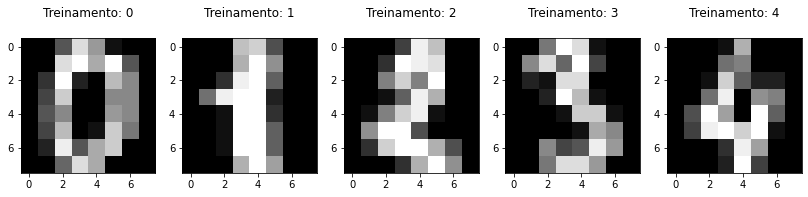

In [64]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(14,4))
for index, (imagem, rotulo) in enumerate(zip(digitos.data[0:5], 
                                           digitos.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(imagem, (8,8)), 
            cmap=plt.cm.gray)
 plt.title('Treinamento: {}\n'.format(rotulo, fontsize = 15))

# **Treinamento**

In [65]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(digitos.data, 
                                   digitos.target, 
                                   test_size=0.25, 
                                   random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), 
                     LogisticRegression())
pipe.fit(x_treino, y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

# **Predição (Classificação)**

In [67]:
x_teste[0]

array([ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11.,
       13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
        0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
        0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
       16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.])

In [69]:
#Aplicar a transformação dos dados para um Tensor
x_teste[0].reshape(1,-1) 

array([[ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11.,
        13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
         0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.]])

In [73]:
previsto=pipe.predict(x_teste[0].reshape(1,-1))
real = y_teste[0]
print('previsto:{}; real:{}'.format(previsto[0], real))

previsto:2; real:2


In [74]:
classificacoes = pipe.predict(x_teste[0:10])
reais = y_teste[0:10]
print('previsto:{}; real:{}'.format(classificacoes, reais))

previsto:[2 8 2 6 6 7 1 9 8 5]; real:[2 8 2 6 6 7 1 9 8 5]


In [75]:
y_pred = pipe.predict(x_teste)

In [76]:
# Uso do método "score" para obter a acurácia do modelo
score = pipe.score(x_teste, y_teste)
print(score)

0.9666666666666667


# **Matriz de Confusão**

**Matriz de Confusão**

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [86]:
matriz_de_confusao = metrics.confusion_matrix(y_teste, 
                              y_pred)
print(matriz_de_confusao)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


**Visualização da Matriz de Confusão**

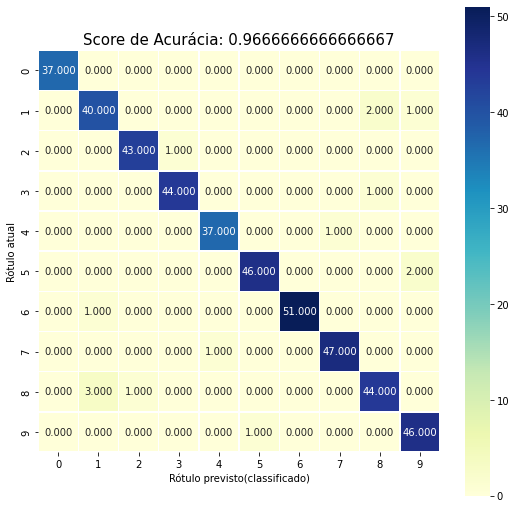

In [91]:
plt.figure(figsize=(9,9))
sns.heatmap(matriz_de_confusao, 
            annot=True, 
            fmt=".3f", 
            linewidths=.5, 
            square = True, 
            cmap = 'YlGnBu');
plt.ylabel('Rótulo atual');
plt.xlabel('Rótulo previsto(classificado)');
titulos_todas_amostras = 'Score de Acurácia: {0}'.format(score)
plt.title(titulos_todas_amostras, size = 15);